In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

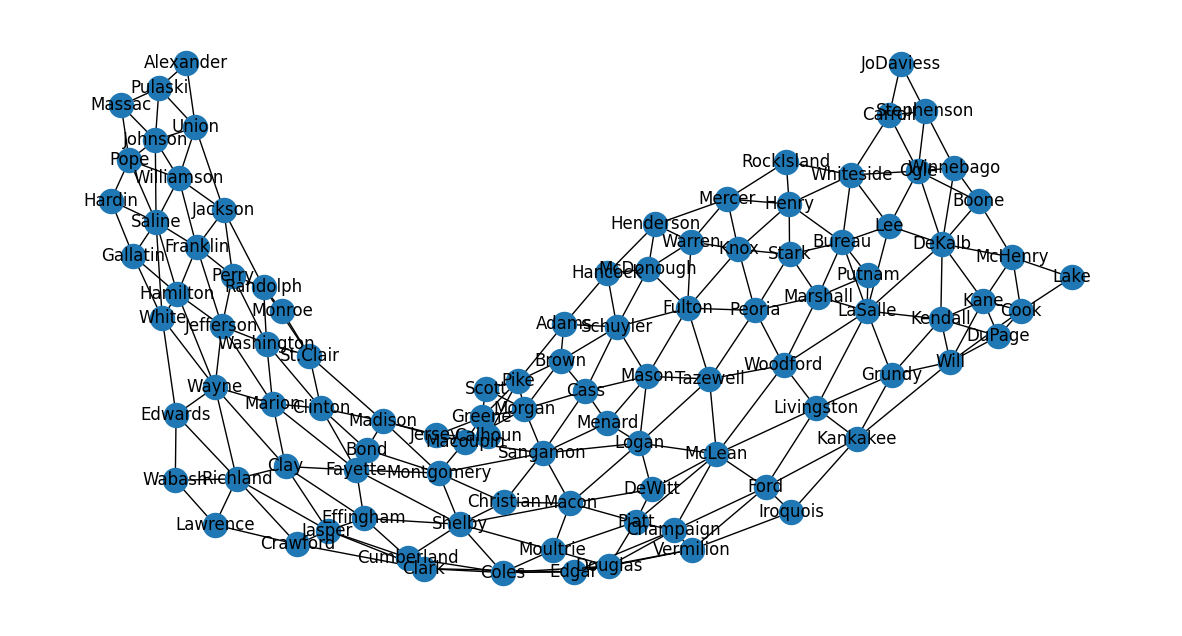

In [2]:
counties = pd.read_csv('data/counties_parsed.csv')

fig, ax = plt.subplots(figsize=(15,8))
G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
nx.draw(G, with_labels=True)
plt.show()

Well it doesn't LOOK like illinois... 